base of tth data https://github.com/pcm-dpc/COVID-19

definitions https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione

In [21]:
import pandas as pd
from datetime import datetime

def parse_date(date):
    return datetime.strptime(date[:10], '%Y-%m-%d')

regions_raw_data = pd.read_csv(
    'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv',
    parse_dates=['data'],
    date_parser=parse_date)

Piedmont_raw_data=regions_raw_data[regions_raw_data.denominazione_regione=='Piemonte']
Piedmont_raw_data=Piedmont_raw_data.rename(columns = {'data': 'dates'},inplace = False)


In [22]:
Piedmont_raw_data.columns

Index(['dates', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note'],
      dtype='object')

In [52]:
# beginning of May
print(Piedmont_raw_data[70:71][['dates','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati']].head())

          dates  ricoverati_con_sintomi  terapia_intensiva  \
1483 2020-05-04                    2391                161   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
1483                  2552                   13010            15562   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  deceduti  \
1483                         -76             192             8874      3186   

      casi_da_sospetto_diagnostico  casi_da_screening  totale_casi  tamponi  \
1483                           NaN                NaN        27622   176078   

      casi_testati  
1483      123801.0  


In [61]:
# verification 'totale_positivi'='ricoverati_con_sintomi'+'terapia_intensiva'+'isolamento_domiciliare'
2391+161+13010

15562

In [62]:
# verification 'totale_casi'='totale_positivi'+'dimessi_guariti'+'deceduti'
15562+8874+3186

27622

In [53]:
# beginning of November
print(Piedmont_raw_data[252:253][['dates','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati']].head())

          dates  ricoverati_con_sintomi  terapia_intensiva  \
5305 2020-11-02                    3108                196   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
5305                  3304                   32791            36095   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  deceduti  \
5305                        1681            2003            34153      4415   

      casi_da_sospetto_diagnostico  casi_da_screening  totale_casi  tamponi  \
5305                       34275.0            40388.0        74663  1050421   

      casi_testati  
5305      652762.0  


In [63]:
# verification 'totale_positivi'='ricoverati_con_sintomi'+'terapia_intensiva'+'isolamento_domiciliare'
3108+196+32791

36095

In [64]:
# verification 'totale_casi'='totale_positivi'+'dimessi_guariti'+'deceduti'
36095+34153+4415

74663

In [65]:
# but also
# verification 'totale_casi'='casi_da_sospetto_diagnostico'+'casi_da_screening'
34275+40388

74663

<AxesSubplot:title={'center':'Figure 1'}, xlabel='dates'>

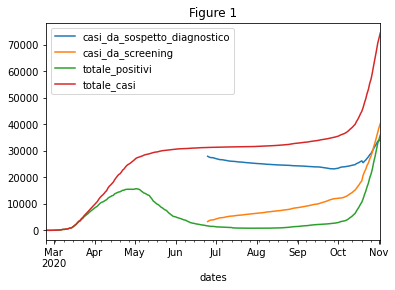

In [67]:
Piedmont_raw_data.plot(x='dates',y=['casi_da_sospetto_diagnostico','casi_da_screening',
                                    'totale_positivi','totale_casi'], title="Figure 1")

# Figure 1



**totale_positivi (@)**  
Totale attualmente positivi (ospedalizzati + isolamento domiciliare)  
Total amount of current positive cases (Hospitalised patients + Home confinement)  
**totale_casi (#)**  
Totale casi positivi  
Total amount of positive cases  
**(@)** contains   
**(#)** contains

Verification in the two examples below.
